https://towardsdatascience.com/how-tracking-apps-analyse-your-gps-data-a-hands-on-tutorial-in-python-756d4db6715d

In [1]:
import datetime as dt
import pandas as pd
import gpxpy as gpx
import haversine as hs

%matplotlib inline

In [2]:
gpx_file = open('strava.gpx')
data = gpx.parse(gpx_file)
points = data.tracks[0].segments[0].points

In [3]:
data

GPX(tracks=[GPXTrack(name='"Der Wind ist dein Freund, er macht dich stark.", haben sie gesagt.', segments=[GPXTrackSegment(points=[...])])])

In [4]:
df = pd.DataFrame(
{
    'lon': [p.longitude for p in points],
    'lat': [p.latitude for p in points],
    'alt': [p.elevation for p in points],
    'time': [p.time for p in points]
})

In [5]:
df.time[0].second

28

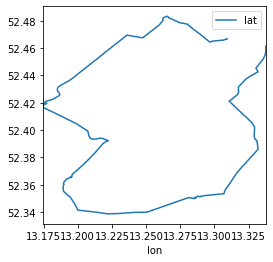

In [6]:
ax = df.plot(x='lon', y='lat')
ax.set_aspect(1)

In [7]:
distances = []
for jj, lat in enumerate(df.lat):
    ii = max(0, jj-1)
    old_xy = (df.lat[ii], df.lon[ii])
    new_xy = (df.lat[jj], df.lon[jj])
    distance = hs.haversine(old_xy, new_xy)
    distances.append(distance)

df['distances'] = distances

# time difference
time_deltas = []
for jj, lat in enumerate(df.time):
    ii = max(0, jj-1)
    old_time = df.time[ii]
    new_time = df.time[jj]
    delta = (new_time - old_time).total_seconds() / 3600
    time_deltas.append(delta)

df['time_delta'] = time_deltas

df['velocity'] = df.distances / df.time_delta
# df.index = df.time_delta.cumsum()
df.index = df.distances.cumsum()
df

,lon,lat,alt,time,distances,time_delta,velocity
distances,,,,,,,
0.000000,13.337639,52.461345,49.0,2020-01-12 12:54:28+00:00,0.000000,0.000000,NaN
0.019153,13.337654,52.461173,48.6,2020-01-12 12:54:30+00:00,0.019153,0.000556,34.474563
0.034505,13.337647,52.461035,48.7,2020-01-12 12:54:32+00:00,0.015352,0.000556,27.634047
0.040437,13.337593,52.460993,48.7,2020-01-12 12:54:33+00:00,0.005933,0.000278,21.357388
0.046123,13.337569,52.460944,48.9,2020-01-12 12:54:34+00:00,0.005686,0.000278,20.469657
...,...,...,...,...,...,...,...
47.466110,13.309179,52.466789,47.6,2020-01-12 14:39:08+00:00,0.007186,0.000278,25.870240
47.471783,13.309252,52.466814,47.5,2020-01-12 14:39:09+00:00,0.005673,0.000278,20.422714
47.475907,13.309301,52.466836,47.4,2020-01-12 14:39:10+00:00,0.004123,0.000278,14.844312


29.25168277040642

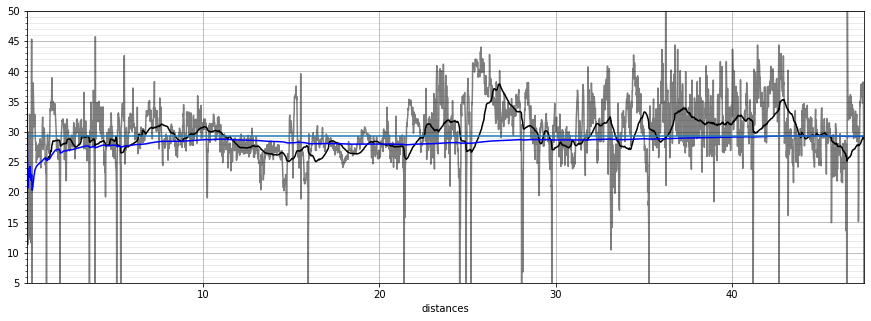

In [8]:
window = 1
v = df.velocity.rolling(window).mean().dropna()
ax = v.plot(figsize=(15, 5), alpha=.5, c='k')
v.rolling(100).mean().plot(ax=ax, c='k')
v.expanding().mean().plot(ax=ax, c='blue')
ax.axhline(v.mean())
ylim = (5, 50)
ax.set_yticks(range(*ylim, 1), minor=True)
ax.set_ylim(*ylim)
ax.grid(which='major')
ax.grid(which='minor', alpha=.3)

v.mean()